# Linear Regression

#### Steps Followed
##### 1.) import neccessary libs
##### 2.) segregate data into x-train,x_test,y_train,y_test
##### 3.) Visualize the data to get clearer picture of our data
##### 4.) Initiate a function , inside it compute y_pred which is mx+c

<img src="Resc\lr.png">   
<hr>
1.) initiate thetas according to number of paramets in ur dataset , theta is size (1) IF THERE IS ONLY 1 PARAMETER

2.) Calculate the size of y_train (target variable) so it gives u the length of examples used

3.) use this length to find mean(average) in future

4.)$y_{pred}= theta \times (x+c)$  --------->  [mx+c]

5.)compute the cost which is squared $\frac{1}{2m}\sum(y_{pred} - y)^2$

6.)differentite cost wrt to theta $dt= 1/2m (y_{pred}-y)^2$
<br>
$dt= 1/2m (theta*x-y)^2$<br>
$dt= 1/2m [2*(theta*x-y)] * diff(theta*x)$<br>
$dt= 1/m [theta*x-y]*x$<br>
$dt= 1/m [y_{pred}-y]*x$<br>

7.) Update theta ----> $theta = theta - \alpha \times dt$ where alpha is      learning rate

8.) Copute all the cost and check if its converging

9.) PLot the obtained theta values with x

## Essentialy What is Happening ?

##### we are trying to learn the slope values from training dataset based on this we are trying to predict y_test by multiplying theta with x_test


##### So basically we are trying get a generalised thta value that would predict for all unknown x by multiplying theta with unknown x 

##### We may also compare our results with actual results and obtain accuracy 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('position_salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
m=len(df)
m

10

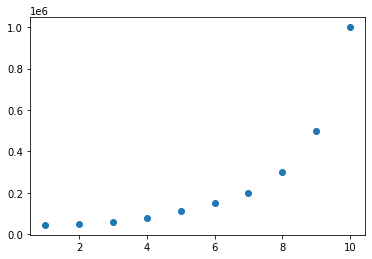

In [4]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(df['Level'], df['Salary'])

In [5]:
df = pd.concat([pd.Series(1, index=df.index, name='00'), df], axis=1)
df = df.drop(columns='Position')


In [6]:
y = df['Salary']
X = df.drop(columns = 'Salary')
y.head()


0     45000
1     50000
2     60000
3     80000
4    110000
Name: Salary, dtype: int64

In [7]:
X.head()

,00,Level
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5


In [8]:
X['Level1'] = X['Level']**2
X['Level2'] = X['Level']**3
X['Level3'] = X['Level']**4
X['Level4'] = X['Level']**5
X['Level5'] = X['Level']**6
X['Level6'] = X['Level']**7

X.head()
X = X/X.max()

In [9]:
y.shape

(10,)

In [10]:

def model(X, Y, learning_rate, iteration):
    costs=[]
    theta = np.array([0.0]*len(X.columns))
    for i in range(iteration):
        y_pred=np.dot(X,theta)
        cost=(1/2*m)*np.sum((np.square(y_pred-Y)))
        d_theta=(1/m)*np.dot(X.T,y_pred-Y)
        theta=theta-(learning_rate*d_theta)
        costs.append(cost)
    return theta,costs,y_pred


In [11]:
iteration = 1000000
learning_rate = 0.0001
theta , cost_list , y_pr = model(X, y, learning_rate = learning_rate,
iteration = iteration)



In [12]:
y_pr-y

0    15825.268250
1    10680.769914
2     2500.039397
3   -11102.280917
4   -24990.979405
5   -29731.309305
6    -9038.665344
7    23692.136884
8    59927.018553
9   -38248.727975
Name: Salary, dtype: float64

In [13]:
theta

array([ 61682.81794078,  -9892.378097  ,   5901.85450249,  58378.61252045,
       121757.8812245 , 184877.46351809, 243331.14199026, 295713.89186459])

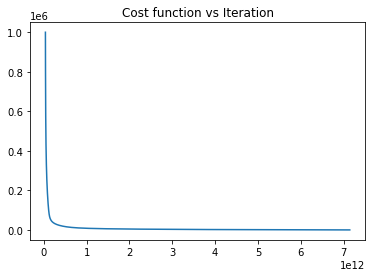

In [14]:
plt.title("Cost function vs Iteration")
plt.plot(cost_list,np.arange(0, iteration))
plt.show()


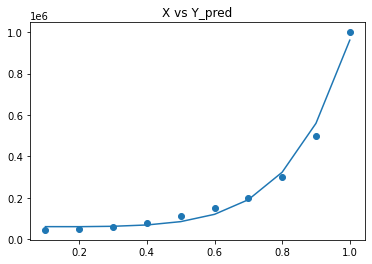

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.title("X vs Y_pred")
plt.scatter(X['Level'], y)          
plt.plot(X['Level'],np.dot(X,theta))
plt.show()

In [17]:
X.tail()


,00,Level,Level1,Level2,Level3,Level4,Level5,Level6
5,1.0,0.6,0.36,0.216,0.1296,0.07776,0.046656,0.027994
6,1.0,0.7,0.49,0.343,0.2401,0.16807,0.117649,0.082354
7,1.0,0.8,0.64,0.512,0.4096,0.32768,0.262144,0.209715
8,1.0,0.9,0.81,0.729,0.6561,0.59049,0.531441,0.478297
9,1.0,1.0,1.00,1.000,1.0000,1.00000,1.000000,1.000000


In [18]:
y.tail()

5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64